In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

#### Importo il dataset iris 

In [2]:
dataset = load_iris()

#### Visualizzo una descrizione del dataset

In [3]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Divido il dataset in X e y

In [4]:
print(dataset)
X = dataset['data']
y = dataset['target']

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### Visualizzo la dimensionalita del dataset

In [5]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


#### Divido il dataset in Train e Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Addestro il modello 

In [7]:
model = DecisionTreeClassifier(random_state=42)

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Faccio eseguire le previsioni al modello sul dataset di test e ne calcolo l'accuratezza

In [9]:
pred = model.predict(X_test)

In [10]:
print(accuracy_score(y_test, pred))

1.0


#### Visualizzo radice, nodi, rami e foglie della struttura ad albero utilizzata

In [11]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold


node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)] 
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("La struttura dell'albero binario ha {n} nodi ed ha "
      "la seguente struttura:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("\nnodo={node} è un nodo foglia.".format(node=i))
    else:
        print("\nnodo={node} è un nodo di split: "
              "passa al nodo {left} se X[:, {feature}] <= {threshold} "
              "altrimenti passa al nodo {right}.".format(
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

La struttura dell'albero binario ha 19 nodi ed ha la seguente struttura:


nodo=0 è un nodo di split: passa al nodo 1 se X[:, 2] <= 2.449999988079071 altrimenti passa al nodo 2.

nodo=1 è un nodo foglia.

nodo=2 è un nodo di split: passa al nodo 3 se X[:, 2] <= 4.75 altrimenti passa al nodo 6.

nodo=3 è un nodo di split: passa al nodo 4 se X[:, 3] <= 1.600000023841858 altrimenti passa al nodo 5.

nodo=4 è un nodo foglia.

nodo=5 è un nodo foglia.

nodo=6 è un nodo di split: passa al nodo 7 se X[:, 3] <= 1.75 altrimenti passa al nodo 14.

nodo=7 è un nodo di split: passa al nodo 8 se X[:, 2] <= 4.950000047683716 altrimenti passa al nodo 9.

nodo=8 è un nodo foglia.

nodo=9 è un nodo di split: passa al nodo 10 se X[:, 3] <= 1.550000011920929 altrimenti passa al nodo 11.

nodo=10 è un nodo foglia.

nodo=11 è un nodo di split: passa al nodo 12 se X[:, 2] <= 5.450000047683716 altrimenti passa al nodo 13.

nodo=12 è un nodo foglia.

nodo=13 è un nodo foglia.

nodo=14 è un nodo di split: pass

#### Visualizzo la struttura dell'albero tramite pyplot e come possiamo notare abbiamo molti nodi con gini pari a 0 (nodi puri)

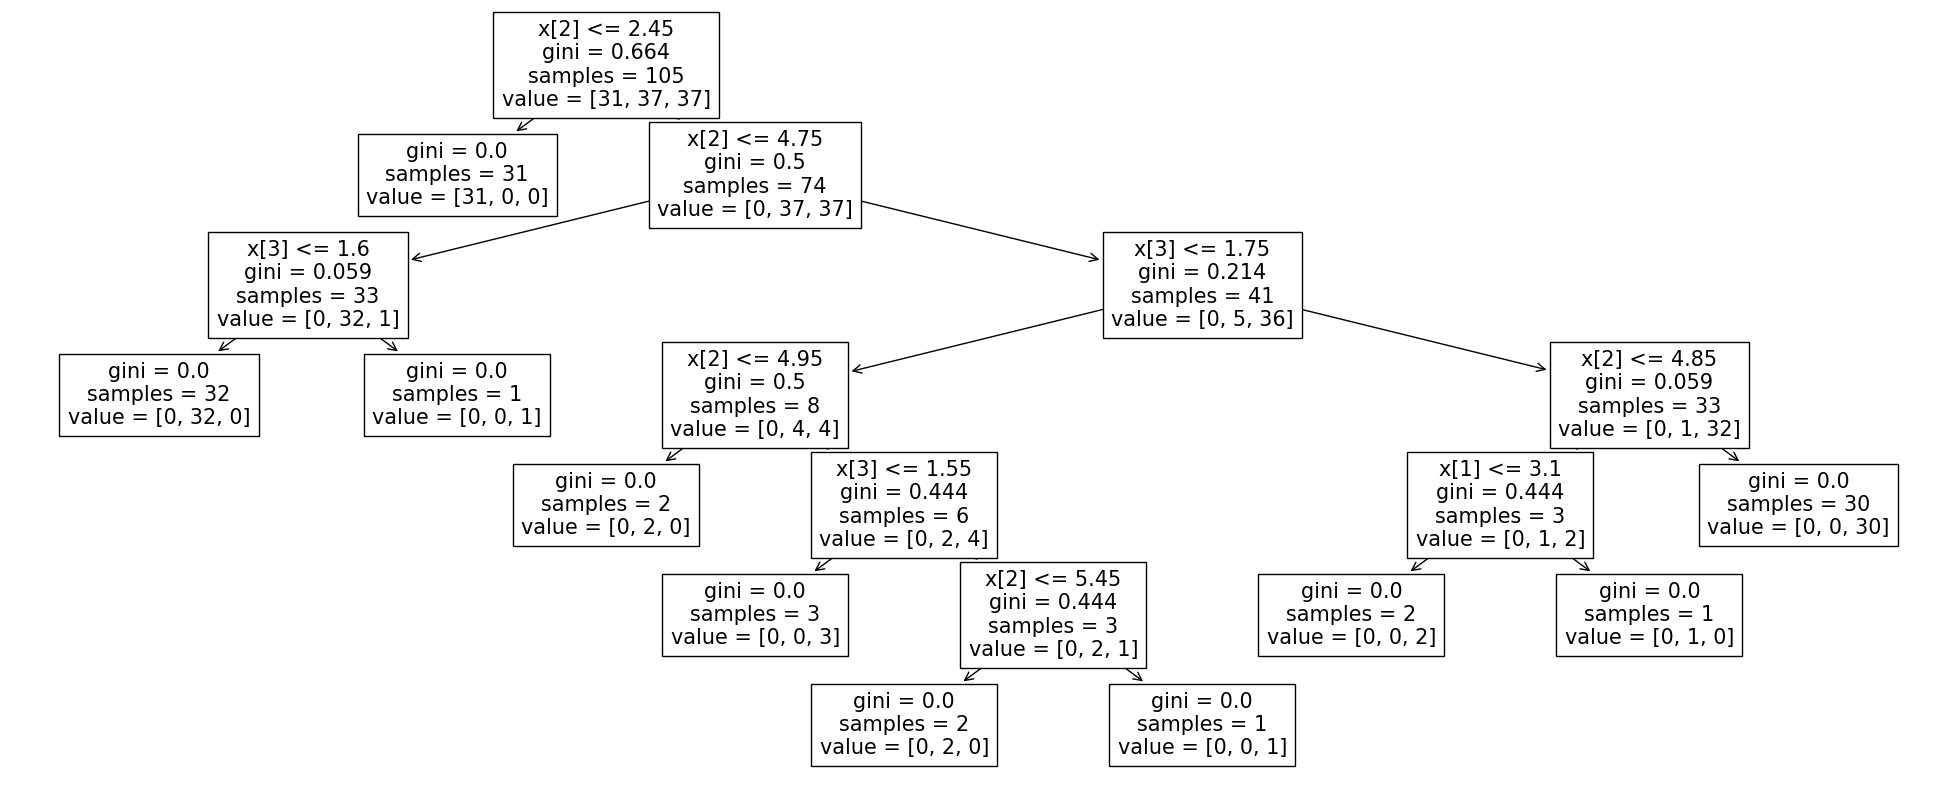

In [12]:
plt.figure(figsize=(25,10))
tree.plot_tree(model)
plt.show()

#### Creo una visualizzazione modificata della struttura dell'albero

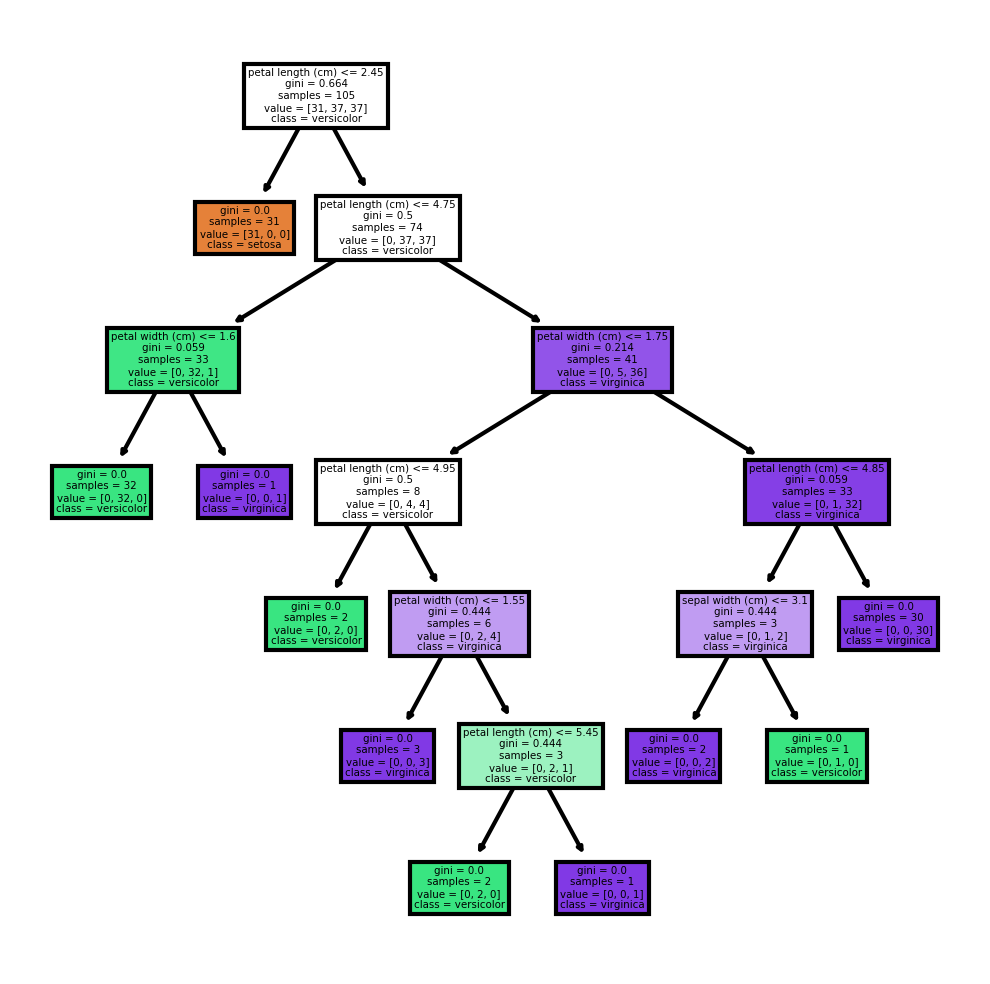

In [13]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')